
# Project: TMDB Movie Data analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


- Here we deal with a data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings and revenue and we need to answer these questions to go ahead with our conclusions.

 - Is there a correlation between budget and revenue?
 - Is there a relationshep between voting rate and the profit?
 - Does the number of votes affect the voting rate?
 - Is the voting average affected by the year of release( old or recent movie )?


In [419]:
#Import packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime as dt


<a id='wrangling'></a>
## Data Wrangling





## Gathering data

In [2]:
#Read CSV file 
movies_df = pd.read_csv('tmdb-movies.csv')

## Assessing data

- Visual assessment
- Programmatic assessment


In [4]:
# number raws & columns in the data set.
movies_df.shape

(10866, 21)

In [5]:
#first 5 records.
movies_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [6]:
#last 5 records.
movies_df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [7]:
# data sample. 
movies_df.sample(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10683,5185,tt0066249,0.429246,10000000,1500000,The Private Life of Sherlock Holmes,Robert Stephens|Colin Blakely|GeneviÃ¨ve Page|...,NaN,Billy Wilder,The Private Life of Sherlock Holmes. Anything ...,...,Director Billy Wilder adds a new and intriguin...,125,Adventure|Comedy|Crime|Mystery|Romance,The Mirisch Production Company|Mirisch Films|S...,10/29/70,21,6.7,1970,5.616368e+07,8.424553e+06
5964,214100,tt2481198,0.133006,0,0,Sunshine on Leith,George MacKay|Kevin Guthrie|Paul Brannigan|Pet...,NaN,Dexter Fletcher,When it happens... there's nothing like it!,...,Davy and Ally have to re-learn how to live lif...,100,Music|Romance|Comedy|Drama,DNA Films,10/3/13,30,6.6,2013,0.000000e+00,0.000000e+00
8049,13633,tt0085210,0.172190,0,9190819,Bad Boys,Sean Penn|Reni Santoni|Jim Moody|Eric Gurry|Es...,NaN,Rick Rosenthal,There's Only One Person Left Who Believes Mick...,...,Chicago crime kid Mick O'Brien has been sent t...,104,Crime|Drama|Thriller,EMI Films,3/25/83,28,6.2,1983,0.000000e+00,2.012157e+07
1198,260535,tt2490004,0.130097,8000000,0,The Little Rascals Save the Day,Drew Justice|Rio Mangini|Jenna Ortega|Eden Woo...,NaN,Alex Zamm,All New Movie,...,The Little Rascals are back in an all-new movi...,93,Comedy,Universal Pictures|Capital Arts Entertainment,3/25/14,16,5.4,2014,7.368728e+06,0.000000e+00
3932,10996,tt0243585,1.594587,120000000,169956806,Stuart Little 2,Michael J. Fox|Geena Davis|Hugh Laurie|Jonatha...,NaN,Rob Minkoff,A Little Goes A Long Way,...,"Stuart, an adorable white mouse, still lives h...",78,Family|Adventure|Animation|Comedy,Columbia Pictures|Sony Pictures Entertainment,7/19/02,366,5.4,2002,1.454714e+08,2.060321e+08


In [8]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [9]:
# check if there is a duplicate.
movies_df.duplicated().sum()

1

In [10]:
# see what is the duplicate.
movies_df[movies_df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [11]:
# check the unique values.
movies_df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [12]:
movies_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Data Qulity

- Missing Values :
  - imdb_id, cast, homepage, director, tagline, keywords, genres, production_companies have Null Values. 
 - two id columns, id and imbd_id.
 - column id is of integer datatype.
 - one duplicate.
 - release_date is of object.

### Tidiness

  - No need for imdb_id, homepage, tagline, keywords, overview columns.
  - create profit column. 

## Data Cleaning

## code

- make a copy of the datafram.

In [13]:
# make a copy of the dataframe.
movies_df_clean = movies_df.copy()

## test 

In [14]:
# check the dataframe.
movies_df_clean.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


## Define

- Drop unneeded columns

## code

In [15]:
# drop imdb_id, homepage, tagline, keywords, overview columns.
movies_df_clean = movies_df_clean.drop(['imdb_id', 'homepage', 'tagline', 'keywords', 'overview'], axis = 1)

## test

In [16]:
# test after deleting unneeded columns.
movies_df_clean.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


## Define

- change id column datatype from integer to string.

## code 

In [17]:
# change the datatype of id column to steing datatype.
movies_df_clean.id = movies_df_clean.id.astype(str)

## test

In [18]:
#test.
movies_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  object 
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   cast                  10790 non-null  object 
 6   director              10822 non-null  object 
 7   runtime               10866 non-null  int64  
 8   genres                10843 non-null  object 
 9   production_companies  9836 non-null   object 
 10  release_date          10866 non-null  object 
 11  vote_count            10866 non-null  int64  
 12  vote_average          10866 non-null  float64
 13  release_year          10866 non-null  int64  
 14  budget_adj            10866 non-null  float64
 15  revenue_adj        

## Define

- change release_date datatype from object to datetime datatype.          

## code 

In [19]:
#change release_date datatype from string to datetime datatype.
movies_df_clean['release_date'] =  pd.to_datetime(movies_df_clean.release_date)

## test

In [20]:
#test.
movies_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10866 non-null  object        
 1   popularity            10866 non-null  float64       
 2   budget                10866 non-null  int64         
 3   revenue               10866 non-null  int64         
 4   original_title        10866 non-null  object        
 5   cast                  10790 non-null  object        
 6   director              10822 non-null  object        
 7   runtime               10866 non-null  int64         
 8   genres                10843 non-null  object        
 9   production_companies  9836 non-null   object        
 10  release_date          10866 non-null  datetime64[ns]
 11  vote_count            10866 non-null  int64         
 12  vote_average          10866 non-null  float64       
 13  release_year    

In [21]:
#test.
movies_df_clean.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


## Define

- Remove duplicate.

## code

In [22]:
# drop the duplicated raw.
movies_df_clean.drop_duplicates(inplace = True)

## test

In [23]:
# test for duplication.
movies_df_clean.duplicated().sum()

0

## Define

- create profit column.

## code

In [24]:
# creat a profit column next to revenue column.
movies_df_clean.insert(4,'profit',movies_df_clean['revenue'] - movies_df_clean['budget'])

## test

In [25]:
#test.
movies_df_clean.head()

,id,popularity,budget,revenue,profit,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


## Define

- Drop Null values.

In [26]:
# check the dataframe shape.
movies_df_clean.shape

(10865, 17)

In [27]:
# check the dataframe null values.
movies_df_clean.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
profit                     0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [28]:
# make a copy of the dataframe.
movies_df_clean2 = movies_df_clean.copy()

## code

In [29]:
# replace zero values with NaN
movies_df_clean.replace(0, np.nan, inplace=True)

In [30]:
# test the code.
movies_df_clean.isnull().sum()

id                         0
popularity                 0
budget                  5696
revenue                 6016
profit                  4705
original_title             0
cast                      76
director                  44
runtime                   31
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

In [31]:
# drop NaN values.
movies_df_clean.dropna(axis=0, how='any', inplace = True)

## test

In [32]:
#test the code.
movies_df_clean.shape

(3802, 17)

In [33]:
# test for Null values.
movies_df_clean.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
profit                  0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [34]:
# test a random sample of the dataframe.
movies_df_clean.sample(10)

,id,popularity,budget,revenue,profit,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
76,227973,2.140199,99000000.0,246233113.0,147233113.0,The Peanuts Movie,Noah Schnapp|Bill Melendez|Venus Schultheis|Ha...,Steve Martino,88.0,Adventure|Animation|Comedy|Family,Blue Sky Studios|Twentieth Century Fox Animati...,2015-11-05,414,6.4,2015,9.107996e+07,2.265344e+08
5133,321,0.276911,4361898.0,3031801.0,-1330097.0,Mambo Italiano,Luke Kirby|Ginette Reno|Paul Sorvino|Mary Wals...,Ã‰mile Gaudreault,92.0,Comedy|Romance,icon,2003-06-06,13,5.2,2003,5.170387e+06,3.593753e+06
5520,68728,1.094958,200000000.0,491868548.0,291868548.0,Oz: The Great and Powerful,James Franco|Mila Kunis|Rachel Weisz|Michelle ...,Sam Raimi,130.0,Fantasy|Adventure|Family,Walt Disney Pictures|Roth Films,2013-03-07,2855,5.6,2013,1.872067e+08,4.604054e+08
10578,26555,0.167621,15000000.0,12308521.0,-2691479.0,Club Paradise,Robin Williams|Peter O'Toole|Rick Moranis|Jimm...,Harold Ramis,96.0,Comedy|Drama|Romance,Warner Bros.,1986-07-11,10,4.1,1986,2.984110e+07,2.448665e+07
10528,11257,0.400218,3000000.0,20966644.0,17966644.0,A Room with a View,Maggie Smith|Helena Bonham Carter|Denholm Elli...,James Ivory,117.0,Drama|Romance,Goldcrest Films International|National Film Fi...,1986-03-07,80,6.6,1986,5.968219e+06,4.171118e+07
2618,39964,0.090186,1.0,100.0,99.0,Lost & Found,David Spade|Sophie Marceau|Ever Carradine|Step...,Jeff Pollack,95.0,Comedy|Romance,Alcon Entertainment|Dinamo Entertainment,1999-04-23,14,4.8,1999,1.309053e+00,1.309053e+02
2091,60309,0.591206,25000000.0,15478800.0,-9521200.0,The Conspirator,Evan Rachel Wood|James McAvoy|Kevin Kline|Robi...,Robert Redford,122.0,Crime|Drama|History,Wildwood Enterprises|American Film Company,2010-09-10,78,5.9,2010,2.500000e+07,1.547880e+07
7637,13501,0.323370,15000000.0,20380.0,-14979620.0,The Good Night,PenÃ©lope Cruz|Martin Freeman|Gwyneth Paltrow|...,Jake Paltrow,93.0,Comedy|Drama|Romance|Fantasy|Music,Destination Films|Tempesta Films|Good Night Pr...,2007-01-25,16,5.5,2007,1.577503e+07,2.143301e+04
3955,320,1.111488,46000000.0,113714830.0,67714830.0,Insomnia,Al Pacino|Robin Williams|Maura Tierney|Hilary ...,Christopher Nolan,118.0,Crime|Mystery|Thriller,Section Eight|Alcon Entertainment|Witt/Thomas ...,2002-05-24,564,6.6,2002,5.576402e+07,1.378521e+08
9038,11932,0.640933,25000000.0,50671850.0,25671850.0,Bride of Chucky,Ed Gale|Jennifer Tilly|Brad Dourif|Katherine H...,Ronny Yu,89.0,Comedy|Horror,Midwinter Productions Inc.,1998-10-16,162,5.4,1998,3.344239e+07,6.778350e+07


## Storing Dataframe

In [35]:
#save the cleaned Datafram to tmdb-movies_clean.csv file.
movies_df_clean.to_csv('tmdb-movies_clean.csv', index=False)

In [36]:
# creat a copy of the Dataframe.
movies_df_final = movies_df_clean.copy()

<a id='eda'></a>
## Exploratory Data Analysis




In [37]:
# check the dataframe.
movies_df_clean.head()

,id,popularity,budget,revenue,profit,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,1.363529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000.0,3.784364e+08,2.284364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000.0,2.952382e+08,1.852382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000.0,2.068178e+09,1.868178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000.0,1.506249e+09,1.316249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [38]:
# explor dataframe statistics.
movies_df_clean.describe()

,popularity,budget,revenue,profit,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3802.000000,3.802000e+03,3.802000e+03,3.802000e+03,3802.000000,3802.000000,3802.000000,3802.000000,3.802000e+03,3.802000e+03
mean,1.204564,3.763731e+07,1.090590e+08,7.142171e+07,109.347975,534.567070,6.170884,2001.234087,4.475462e+07,1.388250e+08
std,1.480886,4.232562e+07,1.773413e+08,1.514228e+08,19.842478,883.986778,0.792368,11.327695,4.488751e+07,2.170482e+08
min,0.010335,1.000000e+00,2.000000e+00,-4.139124e+08,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,0.470865,1.000000e+07,1.436198e+07,-1.176610e+06,96.000000,74.000000,5.700000,1995.000000,1.354924e+07,1.926832e+07
50%,0.811387,2.500000e+07,4.622859e+07,2.049280e+07,106.000000,209.000000,6.200000,2004.000000,3.039101e+07,6.306661e+07
75%,1.387815,5.000000e+07,1.261801e+08,8.348929e+07,119.000000,584.750000,6.700000,2010.000000,6.094840e+07,1.658115e+08
max,32.985763,4.250000e+08,2.781506e+09,2.544506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [118]:
# explor statistics of Budget.
movies_df_clean['budget'].describe()

count    3.802000e+03
mean     3.763731e+07
std      4.232562e+07
min      1.000000e+00
25%      1.000000e+07
50%      2.500000e+07
75%      5.000000e+07
max      4.250000e+08
Name: budget, dtype: float64

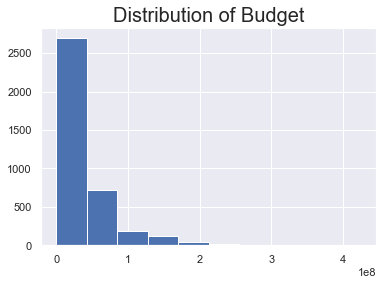

In [356]:
# Distribution of Budget.
movies_df_clean['budget'].hist();
plt.title('Distribution of Budget', fontsize = 20);

- Histogram show right skewed distribution of the Budget with the mean(3.763731e+07) higher than themode(2.500000e+07).

In [114]:
# explor statistics of Revenue.
movies_df_clean['revenue'].describe()

count    3.802000e+03
mean     1.090590e+08
std      1.773413e+08
min      2.000000e+00
25%      1.436198e+07
50%      4.622859e+07
75%      1.261801e+08
max      2.781506e+09
Name: revenue, dtype: float64

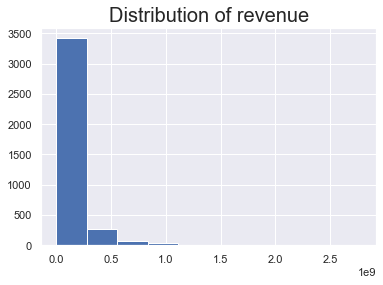

In [359]:
# Distribution of Revenue.
movies_df_clean['revenue'].hist();
plt.title('Distribution of revenue', fontsize = 20);

- Histogram show right skewed distribution of the Revenue with the mean(1.090590e+08) higher than the mode(4.622859e+07).

In [116]:
# explor statistics of vote count.
movies_df_clean['vote_count'].describe()

count    3802.000000
mean      534.567070
std       883.986778
min        10.000000
25%        74.000000
50%       209.000000
75%       584.750000
max      9767.000000
Name: vote_count, dtype: float64

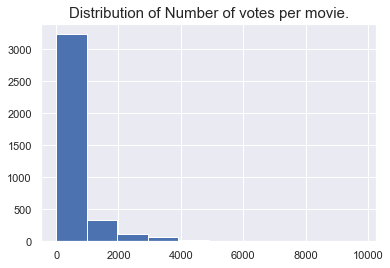

In [361]:
# Distribution of Number of votes per movie.
movies_df_clean['vote_count'].hist();
plt.title('Distribution of Number of votes per movie.', fontsize = 15);

- Histogram show right skewed distribution of the vote count with the mean(534.567070) higher than the mode(209.000000).

In [122]:
# explor statistics of vote rating.
movies_df_clean['vote_average'].describe()

count    3802.000000
mean        6.170884
std         0.792368
min         2.200000
25%         5.700000
50%         6.200000
75%         6.700000
max         8.400000
Name: vote_average, dtype: float64

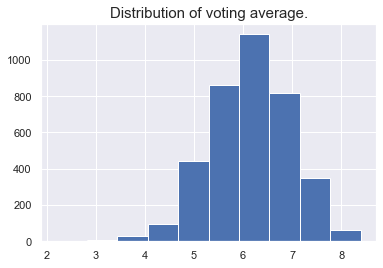

In [362]:
# Distribution of voting average.
movies_df_clean['vote_average'].hist();
plt.title('Distribution of voting average.', fontsize = 15);

- Histogram show Symmetrical Distribution of vote average with the mean(6.170884) nearly equal to the mode(6.200000).

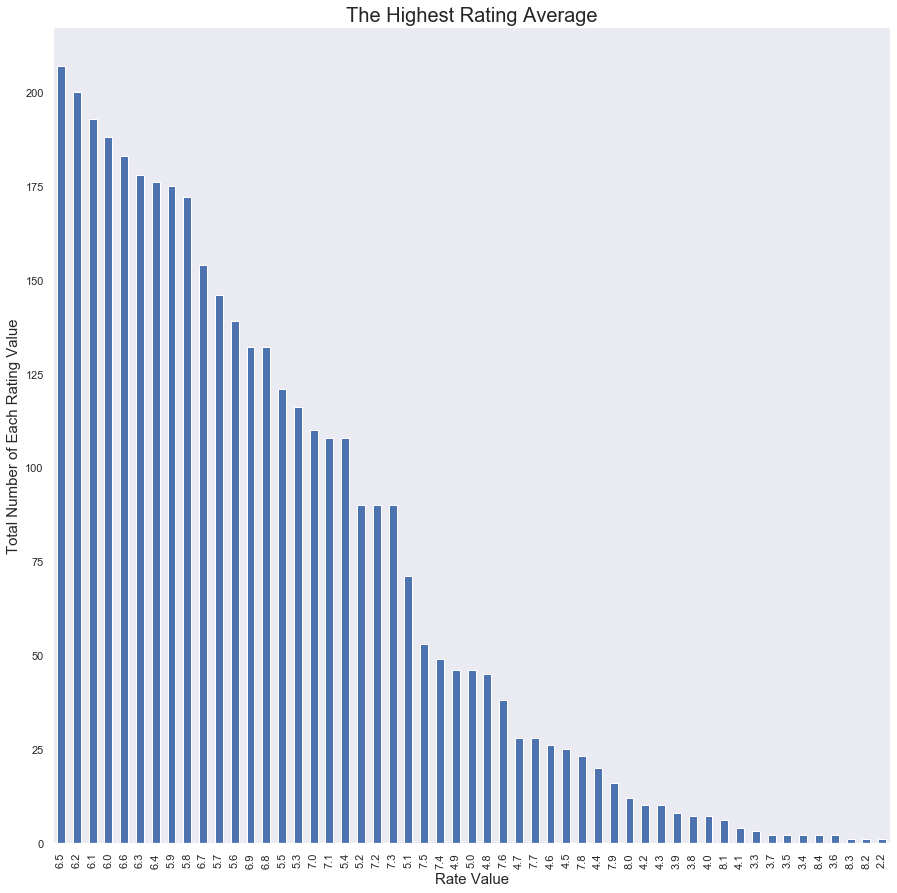

In [355]:
# explore the total number of each rating with the highest rating average.
movies_df_clean['vote_average'].value_counts().plot(kind = 'bar',figsize=(15,15));
plt.title('The Highest Rating Average', fontsize = 20);
plt.xlabel('Rate Value', fontsize = 15);
plt.ylabel('Total Number of Each Rating Value', fontsize = 15);

- Bar chart show The total number of each rate value. 

In [123]:
# explor statistics of Profit.
movies_df_clean['profit'].describe()

count    3.802000e+03
mean     7.142171e+07
std      1.514228e+08
min     -4.139124e+08
25%     -1.176610e+06
50%      2.049280e+07
75%      8.348929e+07
max      2.544506e+09
Name: profit, dtype: float64

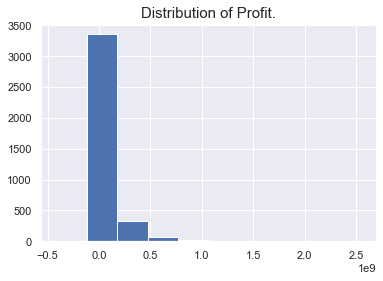

In [363]:
# Distribution of Profit.
movies_df_clean['profit'].hist();
plt.title('Distribution of Profit.', fontsize = 15);

- Histogram show right skewed distribution of Profit with the mean (7.142171e+07) higher than the mode (2.049280e+07).

In [124]:
# explor statistics of year of release.
movies_df_clean['release_year'].describe()

count    3802.000000
mean     2001.234087
std        11.327695
min      1960.000000
25%      1995.000000
50%      2004.000000
75%      2010.000000
max      2015.000000
Name: release_year, dtype: float64

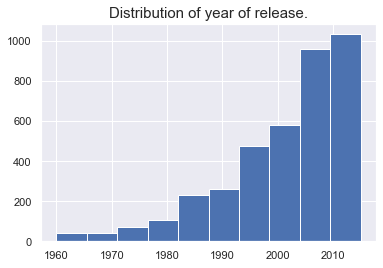

In [364]:
# Distribution of year of release.
movies_df_clean['release_year'].hist();
plt.title('Distribution of year of release.', fontsize = 15);

- Histogram show left skewed distribution of release year with the mean (2001.234087) lower than the mode (2004.000000).

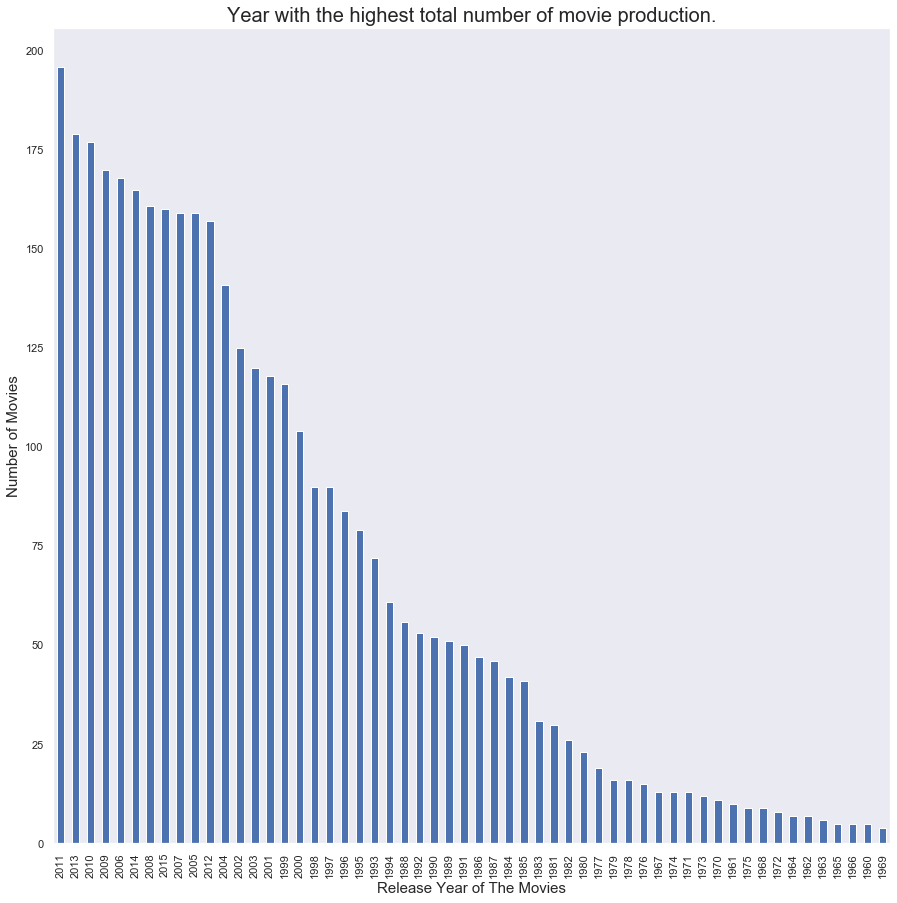

In [367]:
# explore the highest year with total number of movies production.
highest = movies_df_clean['release_year'].sort_values(ascending = False)
highest.value_counts().plot(kind = 'bar',figsize=(15,15));
plt.title('Year with the highest total number of movie production.', fontsize = 20);
plt.xlabel('Release Year of The Movies', fontsize = 15);
plt.ylabel('Number of Movies', fontsize = 15);

- Bar chart show the total number of produced movies each year.

In [273]:
# the highest year with total number of movies production.
highest = movies_df_clean['release_year'].sort_values(axis=0,ascending=False)
print(s.value_counts())

2011    196
2013    179
2010    177
2009    170
2006    168
2014    165
2008    161
2015    160
2007    159
2005    159
2012    157
2004    141
2002    125
2003    120
2001    118
1999    116
2000    104
1998     90
1997     90
1996     84
1995     79
1993     72
1994     61
1988     56
1992     53
1990     52
1989     51
1991     50
1986     47
1987     46
1984     42
1985     41
1983     31
1981     30
1982     26
1980     23
1977     19
1979     16
1978     16
1976     15
1967     13
1974     13
1971     13
1973     12
1970     11
1961     10
1975      9
1968      9
1972      8
1964      7
1962      7
1963      6
1965      5
1966      5
1960      5
1969      4
Name: release_year, dtype: int64


### Research Question 1 (Is there a correlation between budget and revenue?)

In [435]:
 from matplotlib.axes._axes import _log as matplotlib_axes_logger
 matplotlib_axes_logger.setLevel('ERROR')

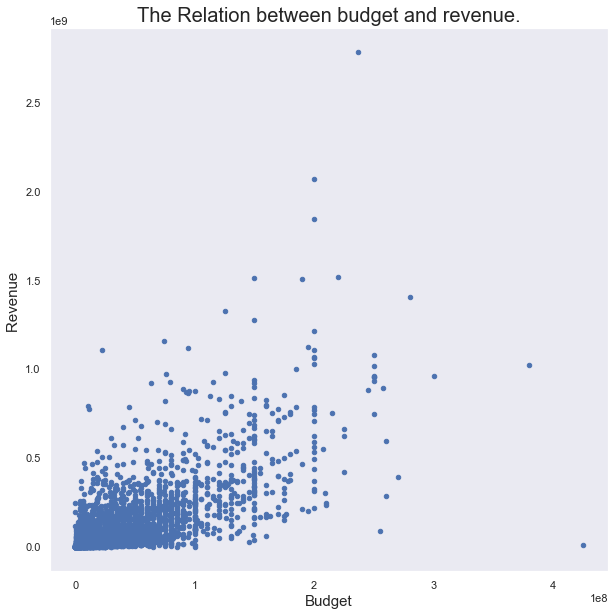

In [436]:

# A scatter plot show the correlation between budget and revenue.
movies_df_clean.plot(x = 'budget', y = 'revenue', kind = 'scatter',figsize=(10,10));
plt.title('The Relation between budget and revenue.', fontsize = 20);
plt.xlabel('Budget', fontsize = 15);
plt.ylabel('Revenue ', fontsize = 15);


- Scatter plot show that there is a great effect of Budget on the Revenue of a movie.

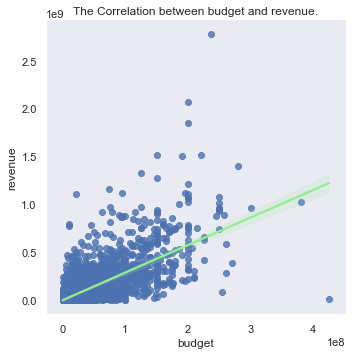

In [442]:
# A scatter plot show the correlation between budget and revenue with a regression line.
sns.lmplot(x="budget", y="revenue", data=movies_df_clean, line_kws={"color": "lightgreen"});
plt.title('The Correlation between budget and revenue.', fontsize = 12);

- scatter plot reveal regression line show that high budget strongly affect the revenue.

In [344]:
# the Correlation Coefficient  reveal the correlation between budget and revenue.
corrcoef_budget_revenue=np.corrcoef(movies_df_clean['budget'], movies_df_clean['revenue'])[0][1]
print(corrcoef_budget_revenue)

0.6869450419802228


### Research Question 2  (Is there a relationshep between voting rate and the profit?)

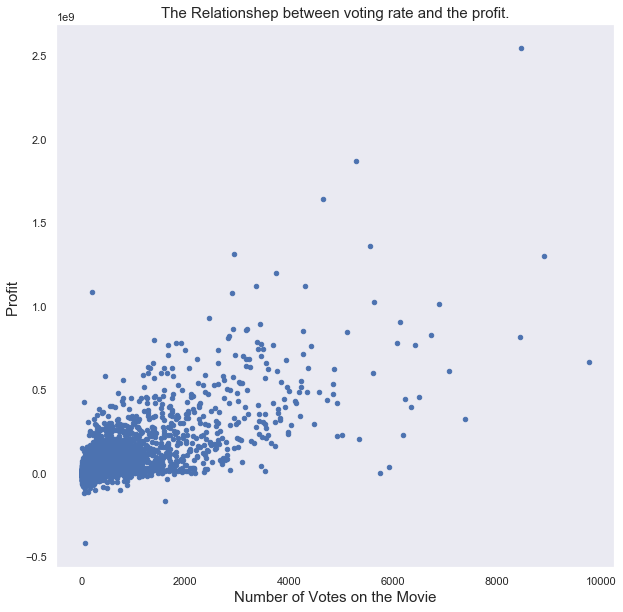

In [437]:
# A scatter plot show the relationshep between voting rate and the profit.
movies_df_clean.plot(x = 'vote_count', y = 'profit', kind = 'scatter',figsize=(10,10));
plt.title('The Relationshep between voting rate and the profit.', fontsize = 15);
plt.xlabel('Number of Votes on the Movie', fontsize = 15);
plt.ylabel('Profit ', fontsize = 15);


- Scatter plot reveal the very strong effect of vote rate on profit.

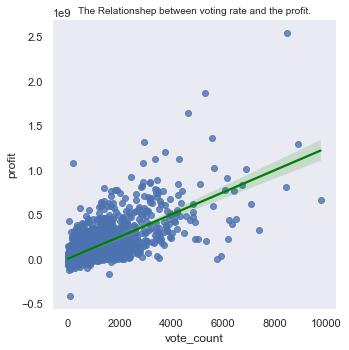

In [397]:
# A scatter plot show the relationshep between voting rate and the profit with a regression line.
sns.lmplot(x="vote_count", y="profit", data=movies_df_clean, line_kws={"color": "green"});
plt.title('The Relationshep between voting rate and the profit.', fontsize = 10);

- scatter plot reveal regression line show that the vote rate have a very strong effect on profit.

In [345]:
# the Correlation Coefficient  reveal the correlation between vote count and profit.
corrcoef_vote_count_profit=np.corrcoef(movies_df_clean['vote_count'], movies_df_clean['profit'])[0][1]
print(corrcoef_vote_count_profit)

0.7274777285317274


### Research Question 3  (Does the number of votes affect the voting rate?)

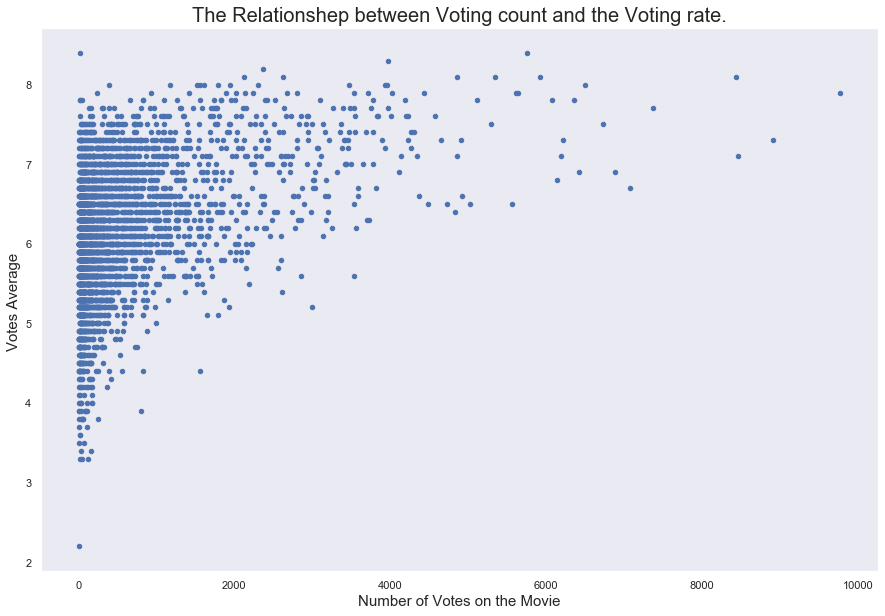

In [438]:
# A scatter plot show if the number of votes affect the voting rate.
movies_df_clean.plot(x = 'vote_count', y = 'vote_average', kind = 'scatter',figsize=(15,10));
plt.title('The Relationshep between Voting count and the Voting rate.', fontsize = 20);
plt.xlabel('Number of Votes on the Movie', fontsize = 15);
plt.ylabel('Votes Average ', fontsize = 15);

 - This scatter plot show us that there is a mild effect of number of voters on the voting rate.

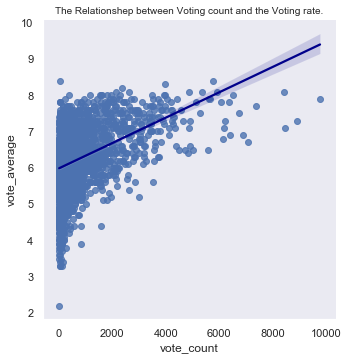

In [404]:
# A scatter plot show if the number of votes affect the voting rate with a regression line.
sns.lmplot(x="vote_count", y="vote_average", data=movies_df_clean, line_kws={"color": "darkblue"});
plt.title('The Relationshep between Voting count and the Voting rate.', fontsize = 10);

- scatter plot reveal regression line show that there is a mild effect of number of voters on the voting rate.

In [346]:
# the Correlation Coefficient  reveal the correlation between vote count and vote average.
corrcoef_vote_count_vote_average=np.corrcoef(movies_df_clean['vote_count'], movies_df_clean['vote_average'])[0][1]
print(corrcoef_vote_count_vote_average)

0.38985763745366364


### Research Question 4  (Is the voting average affected by the year of release( old or recent movie )?)

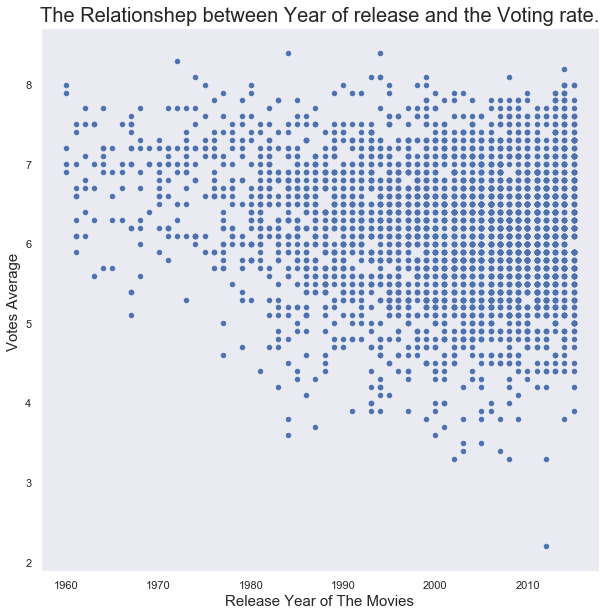

In [439]:
# A scatter plot show if the voting average affected by the year of release.
movies_df_clean.plot(x = 'release_year', y = 'vote_average', kind = 'scatter',figsize=(10,10));
plt.title('The Relationshep between Year of release and the Voting rate.', fontsize = 20);
plt.xlabel('Release Year of The Movies', fontsize = 15);
plt.ylabel('Votes Average ', fontsize = 15);

- Scatter plot show that the recently produced movies less affected by Number of voters.

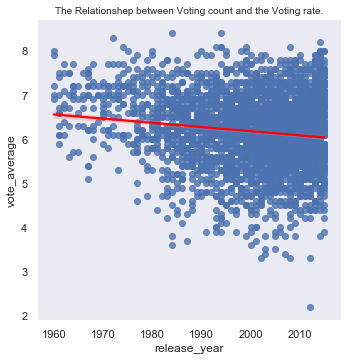

In [407]:
# A scatter plot show if the voting average affected by the year of release with a regression line.
sns.lmplot(x="release_year", y="vote_average", data=movies_df_clean, line_kws={"color": "red"});
plt.title('The Relationshep between Voting count and the Voting rate.', fontsize = 10);

- scatter plot reveal regression line show that there is a decrease in Vote Rate in newly produced movies.

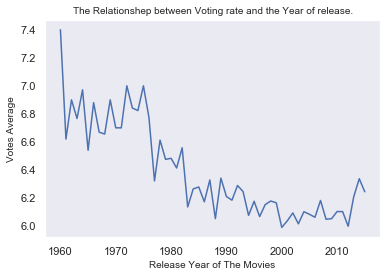

In [409]:
# A Line chart show if the voting average affected by the year of release.
vote_averages_year = movies_df_clean.groupby('release_year')['vote_average'].mean();
plt.plot(vote_averages_year);
plt.title('The Relationshep between Voting rate and the Year of release.', fontsize = 10);
plt.xlabel('Release Year of The Movies', fontsize = 10);
plt.ylabel('Votes Average', fontsize = 10);

- A line plot show that there is a decrease in Vote Rate in newly produced movies.

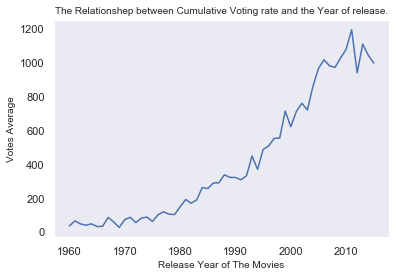

In [410]:
# A Line chart show if the total voting rate affected by the year of release.
vote_averages_year = movies_df_clean.groupby('release_year')['vote_average'].sum();
plt.plot(vote_averages_year);
plt.title('The Relationshep between Cumulative Voting rate and the Year of release.', fontsize = 10);
plt.xlabel('Release Year of The Movies', fontsize = 10);
plt.ylabel('Votes Average', fontsize = 10);

- A line plot show that there is an increase in the Vote Rate Cumulatively in newly produced movies.

In [348]:
# the Correlation Coefficient  reveal the correlation between release year and vote average.
corrcoef_release_year_vote_average=np.corrcoef(movies_df_clean['release_year'], movies_df_clean['vote_average'])[0][1]
print(corrcoef_release_year_vote_average)

-0.1353264985402911


## The Relation Between Release Year and the Vote Count.

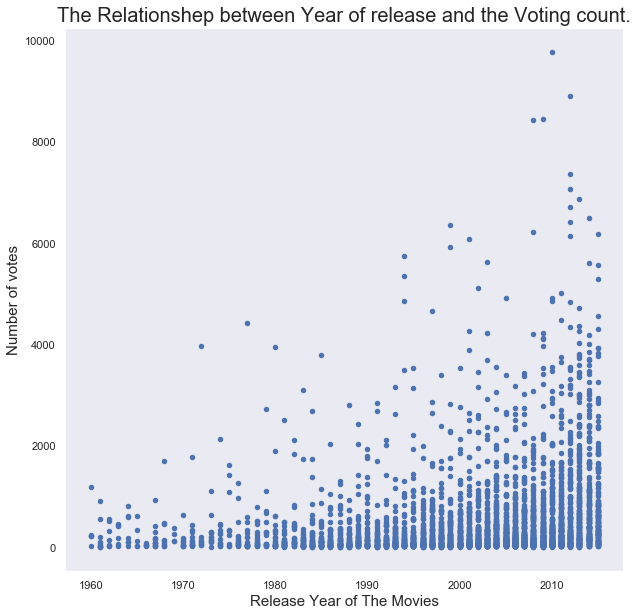

In [440]:
# A scatter plot show if the voting count affected by the year of release.
movies_df_clean.plot(x = 'release_year', y = 'vote_count', kind = 'scatter',figsize=(10,10));
plt.title('The Relationshep between Year of release and the Voting count.', fontsize = 20);
plt.xlabel('Release Year of The Movies', fontsize = 15);
plt.ylabel('Number of votes', fontsize = 15);

- Scatter plot show that there is a little increase in number of votes over the year of movie production.

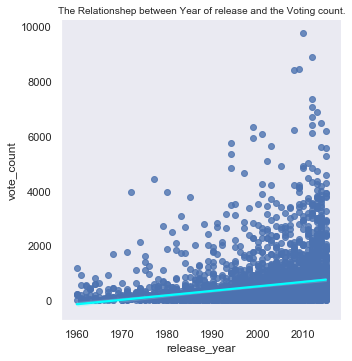

In [412]:
# A scatter plot show if the voting count affected by the year of release with a regression line.
sns.lmplot(x="release_year", y="vote_count", data=movies_df_clean, line_kws={"color": "cyan"});
plt.title('The Relationshep between Year of release and the Voting count.', fontsize = 10);

- scatter plot reveal regression line show that there is a mild relation between number of votes and the year of movie production.

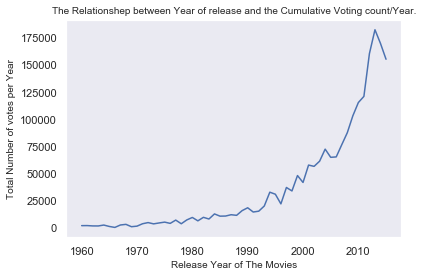

In [414]:
# A Line chart show if the voting count affected by the year of release.
vote_count_year = movies_df_clean.groupby('release_year')['vote_count'].sum();
plt.plot(vote_count_year);
plt.title('The Relationshep between Year of release and the Cumulative Voting count/Year.', fontsize =10);
plt.xlabel('Release Year of The Movies', fontsize = 10);
plt.ylabel('Total Number of votes per Year', fontsize = 10);

- A line plot show that there is an increase in the Vote Count Cumulatively in newly produced movies.

In [349]:
# the Correlation Coefficient  reveal the correlation between release year and vote count.
corrcoef_release_year_vote_count=np.corrcoef(movies_df_clean['release_year'], movies_df_clean['vote_count'])[0][1]
print(corrcoef_release_year_vote_count)

0.20957777682724507


# The Limitations

- The high number of missed values especially Budget(5696)  and the Revenue(6016) that equal nearly about 50% of the total dataset.
- Although the vote count has a minimal effect on the voting rate, I think an equal vote count for all movies will reveal the accurate variation in the voting rate between movies.

<a id='conclusions'></a>
## Conclusions

- Although  there is mild effect of number of voters on the voting rate (mild positive correlation coef), The recently produced movies less affected by Number of voters(mild positive correlation coef. between vote count and year of release) and has lower vote rate than older movies (mild negative correlation coef. between vote rate and year of release), The vote rate have a very strong effect on profit (very strong  positive correlation coef. between the vote rate and profit). inspite of the high budget strongly affect the revenue(strong positive corre. coef. between budget and revenue).